In [1]:
!nvidia-smi -L

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [2]:
! pip install -q kaggle

In [7]:
from google.colab import files
files.upload()



Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"karimcossentini","key":"3f57eca88f2093c1b3633d66fe5d8cc1"}'}

In [8]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

mkdir: cannot create directory ‘/root/.kaggle’: File exists
ref                                                             title                                            size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  ----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
akshaydattatraykhare/diabetes-dataset                           Diabetes Dataset                                  9KB  2022-10-06 08:55:25          11775        372  1.0              
whenamancodes/covid-19-coronavirus-pandemic-dataset             COVID -19 Coronavirus Pandemic Dataset           11KB  2022-09-30 04:05:11           9386        288  1.0              
stetsondone/video-game-sales-by-genre                           Video Game Sales by Genre                        12KB  2022-10-31 17:56:01            963         23  1.0              
whenamancodes/credit

In [9]:
!kaggle datasets download -d felicepollano/watermarked-not-watermarked-images

 99% 693M/698M [00:05<00:00, 139MB/s]
100% 698M/698M [00:05<00:00, 139MB/s]


In [10]:
! unzip /content/watermarked-not-watermarked-images.zip -d /content



Streaming output truncated to the last 5000 lines.
  inflating: /content/wm-nowm/valid/no-watermark/pexels-photo-3535082.jpeg  
  inflating: /content/wm-nowm/valid/no-watermark/pexels-photo-3535630.jpeg  
  inflating: /content/wm-nowm/valid/no-watermark/pexels-photo-3536072.jpeg  
  inflating: /content/wm-nowm/valid/no-watermark/pexels-photo-3536235.jpeg  
  inflating: /content/wm-nowm/valid/no-watermark/pexels-photo-3536271.jpeg  
  inflating: /content/wm-nowm/valid/no-watermark/pexels-photo-3536293.jpeg  
  inflating: /content/wm-nowm/valid/no-watermark/pexels-photo-3536426.jpeg  
  inflating: /content/wm-nowm/valid/no-watermark/pexels-photo-3536516.jpeg  
  inflating: /content/wm-nowm/valid/no-watermark/pexels-photo-3539894.jpeg  
  inflating: /content/wm-nowm/valid/no-watermark/pexels-photo-3539898.jpeg  
  inflating: /content/wm-nowm/valid/no-watermark/pexels-photo-3544555.jpeg  
  inflating: /content/wm-nowm/valid/no-watermark/pexels-photo-3546189.jpeg  
  inflating: /content/wm-

In [11]:
%matplotlib inline
import cv2
import os
import copy

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import torchvision
import random
from os import listdir
from os.path import isfile, join
import torchvision.models as models
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torch.utils.data as data
from torch import nn

# import skimage
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

torch.manual_seed(0)


NameError: ignored

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

In [25]:
IMG_SIZE=324
BATCH_SIZE = 8
TRAIN_DATA_PATH = "/content/wm-nowm/train"
TEST_DATA_PATH = "/content/wm-nowm/valid"


transforms_train = transforms.Compose(
    [
        transforms.Resize((IMG_SIZE, IMG_SIZE)),
        transforms.ToTensor(),
    ]
)

transforms_test = transforms.Compose(
    [
        transforms.Resize((IMG_SIZE, IMG_SIZE)),
        transforms.ToTensor(),
    ]
)



train_data = torchvision.datasets.ImageFolder(root=TRAIN_DATA_PATH, transform=transforms_train)
trainloader = data.DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True,  num_workers=4)
test_data = torchvision.datasets.ImageFolder(root=TEST_DATA_PATH, transform=transforms_test)
testloader  = data.DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=True, num_workers=4) 

---------------------------------------------------
<<__watermarked_images__>>
---------------------------------------------------


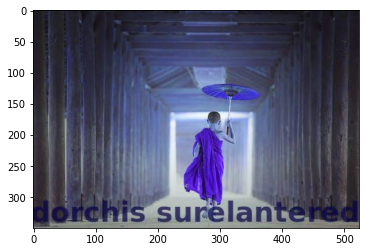

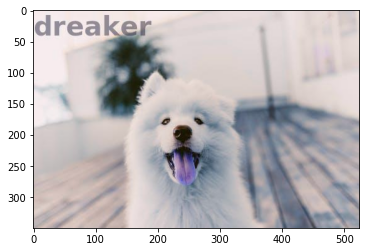

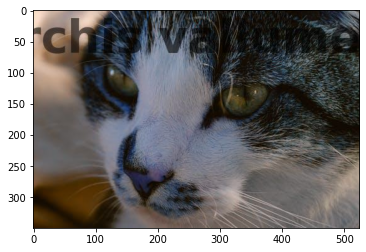

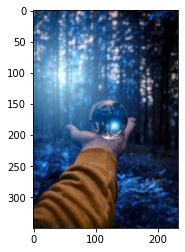

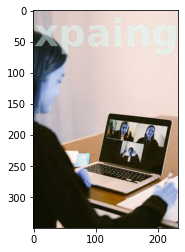

In [19]:
train_watermark = '/content/wm-nowm/train/watermark'
print('---------------------------------------------------')
print('<<__watermarked_images__>>')
print('---------------------------------------------------')

for img in os.listdir(train_watermark)[:5]:
    img_path = os.path.join(train_watermark,img)
    image = cv2.imread(img_path)
    plt.imshow(image)
    plt.show()
    

In [ ]:
train_no_watermark = '/content/wm-nowm/train/no-watermark'
print('---------------------------------------------------')
print('<<__no_watermarked_images__>>')
print('---------------------------------------------------')

for img in os.listdir(train_no_watermark)[:5]:
    img_path = os.path.join(train_no_watermark,img)
    image = cv2.imread(img_path)
    plt.imshow(image)
    plt.show()

# **DATA EXPLORATION**

**Train Data**

In [166]:
import fnmatch
train_dict={'label':[],'count':[]}

watermarked_count = len(fnmatch.filter(os.listdir(train_watermark), '*.*'))
if 'watermarked' not in train_dict['label']:
  train_dict['label'].append('watermarked') 
  train_dict['count'].append(watermarked_count)
print('train watermarked images count:', watermarked_count)

train watermarked images count: 12510


In [168]:
no_watermarked_count = len(fnmatch.filter(os.listdir(train_no_watermark), '*.*'))
if 'no_watermarked' not in train_dict['label']:
  train_dict['label'].append('no_watermarked')
  train_dict['count'].append(no_watermarked_count)
print('train no_watermarked images count:', no_watermarked_count)

train no_watermarked images count: 12477


In [169]:
print('Total train images count: ',watermarked_count+no_watermarked_count)

Total train images count:  24987


In [171]:
train_df = pd.DataFrame(train_dict)

**Validation Data**

In [180]:
valid_watermark = '/content/wm-nowm/valid/watermark'
valid_dict={'label':[],'count':[]}

watermarked_count = len(fnmatch.filter(os.listdir(valid_watermark), '*.*'))
if 'watermarked' not in valid_dict['label']:
  valid_dict['label'].append('watermarked')
  valid_dict['count'].append(watermarked_count)
print('validation watermarked images count:', watermarked_count)

validation watermarked images count: 3299


In [183]:
valid_no_watermark = '/content/wm-nowm/valid/no-watermark'

no_watermarked_count = len(fnmatch.filter(os.listdir(valid_no_watermark), '*.*'))
if 'no_watermarked' not in valid_dict['label']:
  valid_dict['label'].append('no_watermarked')
  valid_dict['count'].append(no_watermarked_count)
print('validation no_watermarked images count:', no_watermarked_count)

validation no_watermarked images count: 3289


In [184]:
print('Total validation images count: ',watermarked_count+no_watermarked_count)

Total validation images count:  6588


In [185]:
valid_df = pd.DataFrame(valid_dict)

In [187]:
import plotly.graph_objects as go

fig = go.Figure(
    data=[
        go.Bar(name='train', x=train_df['label'],y=train_df['count']),
        go.Bar(name='validation', x=valid_df['label'],y=valid_df['count'])
    ],
    layout={
        'yaxis': {'title': 'Count'},
    }
)

fig.update_layout(barmode = 'group')
fig.show()